In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [2]:
train = pd.read_csv(r"C:\Users\saran\Documents\train.csv")
test = pd.read_csv(r"C:\Users\saran\Documents\test.csv")

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### OUR ACTION PLAN++++++++++++
1. EDA -- VISUALIAZATION
2. FEATURE ENGINEERING
3. FEATURE SELECTION
4. MODEL SELECTION
5. SAVING THE  SELECTED MODEL

## EDA

In [29]:
# segregate the columns based on data types

num_col = [col for col in train.columns if train[col].dtypes != "O"]

discreate_col = [col for col in num_col if train[col].nunique() < 20]
continuous_col = [col for col in num_col if col not in discreate_col]
cat_col = [col for col in train.columns if train[col].dtypes=="O"]

print(len(num_col))
print(len(discreate_col))
print(len(continuous_col))
print(len(cat_col))

7
4
3
5


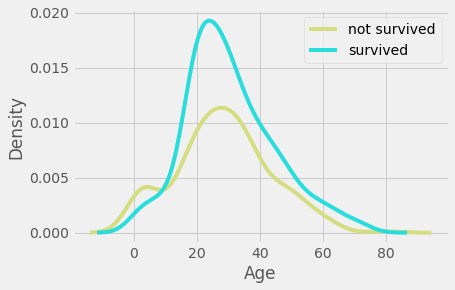

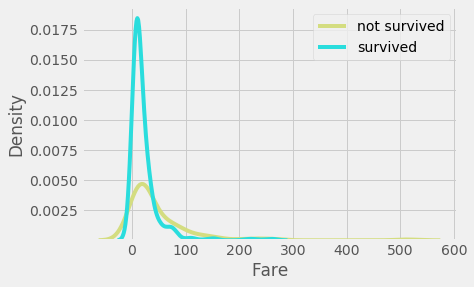

In [30]:
for col in continuous_col:
    if col != "PassengerId":
        plt.style.use("fivethirtyeight")
        sns.kdeplot(col,data=train,hue="Survived",palette="rainbow")
        plt.legend(("not survived","survived"))
        plt.show()

In [31]:
# IN Above observation Fare feature is right skewed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


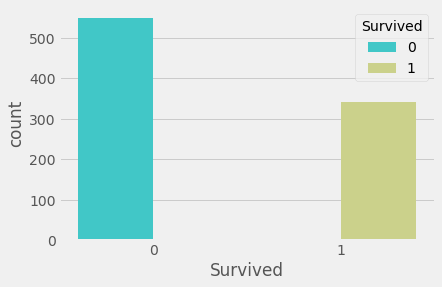

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


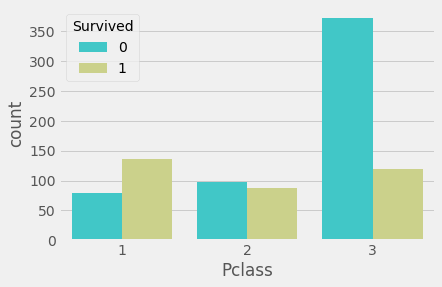

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


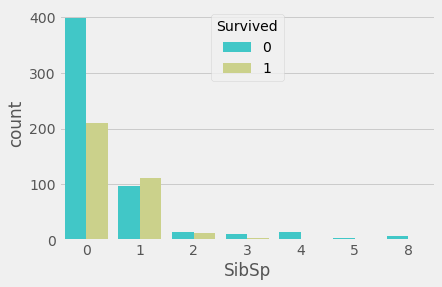

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


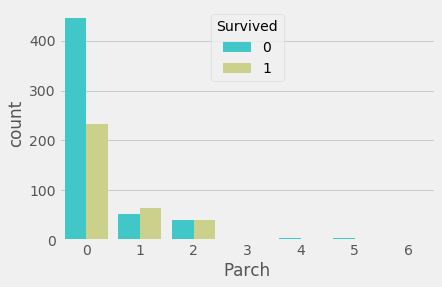

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


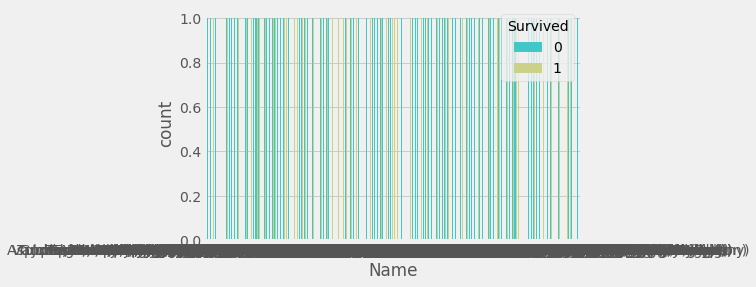

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


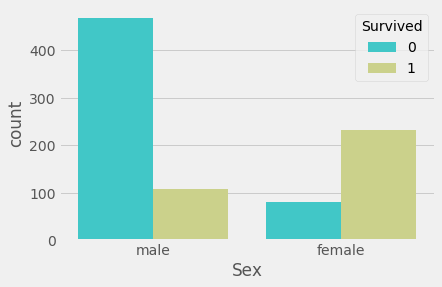

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


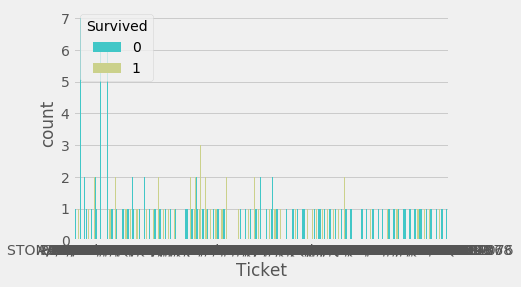

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


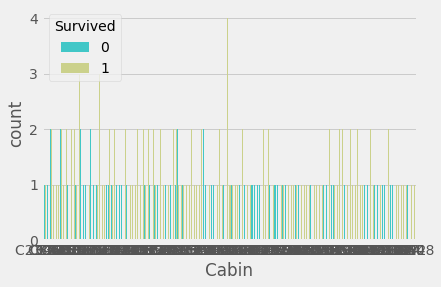

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


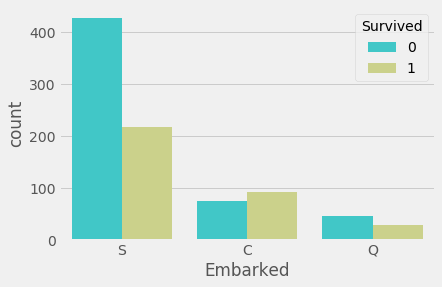

In [26]:
for col in discreate_col+cat_col:
    plt.style.use("fivethirtyeight")
    sns.countplot(col,hue="Survived",data=train,palette="rainbow")
    plt.show()

#### IN  ABOVE observation :
1. survived class label are imbalanced.. 0 = 549,1=342

2. the person who belongs to Pclass 1 had survived most & the person who belongs to Pclass 3 had died most.

3.  the person who had zero sibilings & Spous had survived the most.

4. the person who had zero parch had survived the most.

5 the person who was male Died most.

6 the person who was female survived the most.

7 the person who was in s of Embarked survived the most.

## Feature Engineering

#### DEALING WITH MISSING VAUES..

In [5]:
traindf = train.copy()
testdf = test.copy()

In [6]:
missing = traindf.isnull().sum()
mising_pct = traindf.isnull().mean()
missing_df = pd.DataFrame({"missing":missing,"missing_pct":mising_pct})
missing_df

,missing,missing_pct
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


#### BASED ON THE MISSING PCT  WE WILL DEAL WITH NAN VALUES
1 COL WHICH HAS MISSING_PCT IS highter than 40% , we will use capture_nan method..(FOR NOT MISSING COMPLETLY AT RANDOM)


2 col which has missing_pct is lower than 40% , we will use RandomSampleImputation method...(FOR NOT MISSING COMPLETLY AT RANDOM)




3 col which has mising_pct is (FOR MISSING COMPLETLY AT RANDOM) , we will replace by freaquent categories...

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

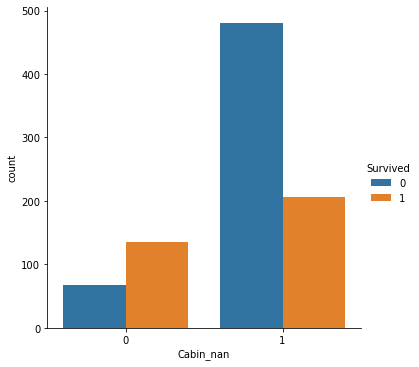

In [7]:
# BEFORE GOING AHEAD WE WILL CHECK WHETER NULL VALUES of Cabin column DEPENDS ON LABEL FEATURE OR NOT?

data = traindf.copy()
data["Cabin_nan"] = np.where(data["Cabin"].isnull(),1,0)

plt.figure()
sns.catplot("Cabin_nan",kind="count",hue="Survived",data=data)
plt.show()



# SO THE MISSING VALUE IN Cabin  columns depends on the Survived feature..(the no. of survived for nan is high)

In [8]:
class Impute:
    """
    this class specially designed for imputing the missing values based on different strategies.
    written_by :  SARANG TAMRAKAR
    VERSION = 1.0
    
    """
    def __init__(self):
        pass
    
    
    
    def impute_capture_nan(self,var,df):
        
        """ this function impute nan values by mode along with capturing the nan"""
        
        df[var+"_nan"] = np.where(df[var].isnull(),1,0)
        self.mode = df[var].mode()[0]
        df[var] = df[var].fillna(self.mode)
    
    
    
    def impute_randomsample(self,df,var):
        
        """ this function impute the nan values by random samples from col itself.
        
        ADVANTAGE: it does not distort the KDE distribution of feature, while median imputation distorts...
        
        """
        
        random_sample = df[var].dropna().sample(df[var].isnull().sum(),random_state=11)
        random_sample.index = df[df[var].isnull()].index # index matching of nan & random sample
        df.loc[df[var].isnull(),var] = random_sample
    
    
    
    def impute_frequent_cat(self,var,df):
        
        """this function impute the missing values by most frequent category """
        
        self.mode = df[var].mode()[0]
        df[var] = df[var].fillna(self.mode)
        

        

In [10]:
obj = Impute()

In [11]:
# capture nan  imputation for train & test+++++++++++++

obj.impute_capture_nan("Cabin",traindf)
obj.impute_capture_nan("Cabin",testdf)

In [14]:
# impute_random_sample for train test ++++++++

obj.impute_randomsample(traindf,"Age")
obj.impute_randomsample(testdf,"Age")

In [18]:
# impute_frequent_cat for train & test ++++++++

obj.impute_frequent_cat("Embarked",traindf)
obj.impute_frequent_cat("Embarked",testdf)

In [21]:
# again checking nan values

In [20]:
missing = traindf.isnull().sum()
mising_pct = traindf.isnull().mean()
missing_df = pd.DataFrame({"missing":missing,"missing_pct":mising_pct})
missing_df

,missing,missing_pct
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [ ]:
#### Encodi